### M1 — Cerebral Stroke Detection  
**Authors:** Maria Abreu & Ruben Ferreiro
**Dataset:** `dataset.csv` (demographic, personal and clinic data)  
**Goal:** prepare the data to detect potential `stroke` cases, following steps like data cleanning, preprocessing and respective pipelines.
These steps are to prepare the data for the next M2 task, where is going to be modeled, validated and evaluated.

#### Workflow Steps
1. Load and exploring data
2. Identify variable types (numerical, categorical, ordinal, binary)
3. Split the data into training/validation/test, using stratifying
4. Treat missing values and other inconsistencies
5. Codificate variables
6. Create preprocessing pipelines
7. Apply the preprocessing to the data

#### Dataset Variables
- `age`, `bmi`, `avg_glucose_level` — numerical  
- `gender`, `work_type`, `Residence_type`, `ever_married` — nominal categorical 
- `smoking_status` — ordinal  
- `hypertension`, `heart_disease` — binary (0/1)  
- `stroke` — target (0/1)

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Load dataset
df = pd.read_csv('dataset.csv')

# Drop unnecessary columns
df.drop('id', axis=1, inplace=True)

# Summary of data
df.describe(include='all')


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,43400,43400.000000,43400.000000,43400.000000,43400,43400,43400,43400.000000,41938.000000,30108,43400.000000
unique,3,NaN,NaN,NaN,2,5,2,NaN,NaN,3,NaN
top,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,25665,NaN,NaN,NaN,27938,24834,21756,NaN,NaN,16053,NaN
mean,NaN,42.217894,0.093571,0.047512,NaN,NaN,NaN,104.482750,28.605038,NaN,0.018041
std,NaN,22.519649,0.291235,0.212733,NaN,NaN,NaN,43.111751,7.770020,NaN,0.133103
min,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.000000,10.100000,NaN,0.000000
25%,NaN,24.000000,0.000000,0.000000,NaN,NaN,NaN,77.540000,23.200000,NaN,0.000000
50%,NaN,44.000000,0.000000,0.000000,NaN,NaN,NaN,91.580000,27.700000,NaN,0.000000
75%,NaN,60.000000,0.000000,0.000000,NaN,NaN,NaN,112.070000,32.900000,NaN,0.000000


In [20]:
display(df.head())
display(df.info())
print("Missing values by column:\n", df.isna().sum())
print("Target distribuition:\n", df['stroke'].value_counts(normalize=True))

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             43400 non-null  object 
 1   age                43400 non-null  float64
 2   hypertension       43400 non-null  int64  
 3   heart_disease      43400 non-null  int64  
 4   ever_married       43400 non-null  object 
 5   work_type          43400 non-null  object 
 6   Residence_type     43400 non-null  object 
 7   avg_glucose_level  43400 non-null  float64
 8   bmi                41938 non-null  float64
 9   smoking_status     30108 non-null  object 
 10  stroke             43400 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 3.6+ MB


None

Missing values by column:
 gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64
Target distribuition:
 stroke
0    0.981959
1    0.018041
Name: proportion, dtype: float64


### Split data: training / validation / testing

#### Goal
Create subsets for training, validation and testing to ensure a robust model evaluation.

#### Decisions
- Final division: training ≈ 60%, validation ≈ 20%, testing ≈ 20%.  
- Use `stratify` to maintain the same proportion of target variable for each subset.
- `random_state` for reproducibility.

#### Output
- Print of the subsets sizes to confirm the expected proportions.  
- Target distribution is the same across all subsets.

In [21]:
# Split data: training/test sets
x = df.drop('stroke', axis=1)
y = df['stroke']

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

# Create validation set from the training portion
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.25, random_state=42, stratify=y_train
)

# Print shapes
print("Train:", x_train.shape, "Val:", x_val.shape, "Test:", x_test.shape)

# Verify stratification
print("\nTarget Distribution")
print("Original Target %:", y.mean())
print("Train Target %:   ", y_train.mean())
print("Val Target %:     ", y_val.mean())
print("Test Target %:    ", y_test.mean())

Train: (26040, 10) Val: (8680, 10) Test: (8680, 10)

Target Distribution
Original Target %: 0.01804147465437788
Train Target %:    0.01804915514592934
Val Target %:      0.017972350230414748
Test Target %:     0.018087557603686636


### Create Features Groups

#### Goal
Organize columns by type (numerical, categorical, ordinal, binary) to apply respective transformations.

#### Output
- Confirm every column exists in the dataframe.

In [22]:
# Define feature types
numerical_features = ['age', 'bmi', 'avg_glucose_level']
categorical_features = ['gender', 'ever_married', 'work_type', 'Residence_type']
ordinal_features = ['smoking_status']
binary_features = ['hypertension', 'heart_disease']


### Exploratory Visualizations

In this section, we visualize numeric and categorical variables to understand
their distribution, detect outliers, and observe relationships between features.

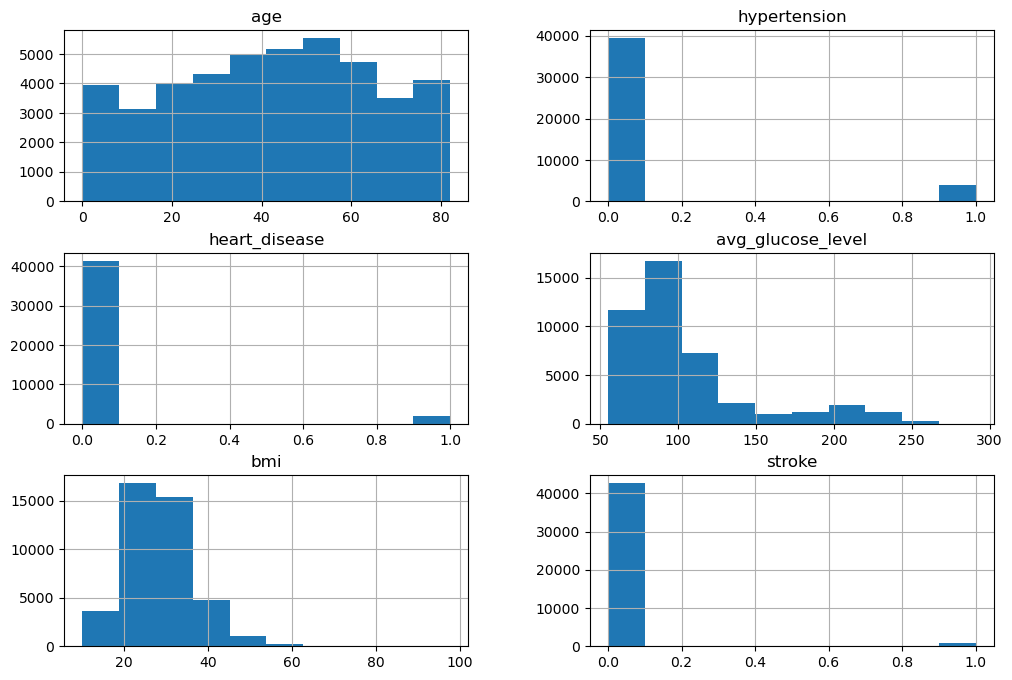

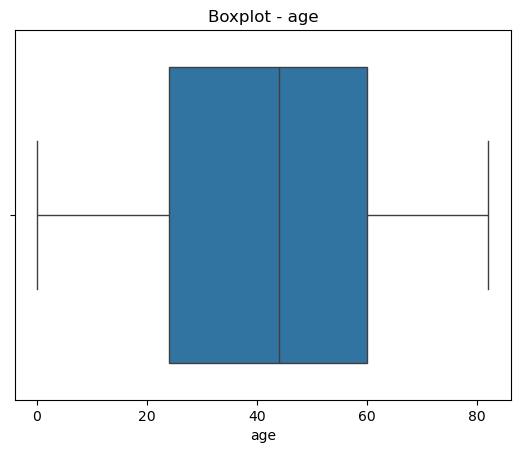

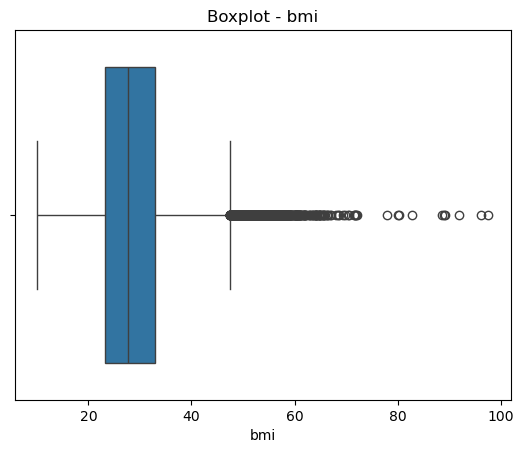

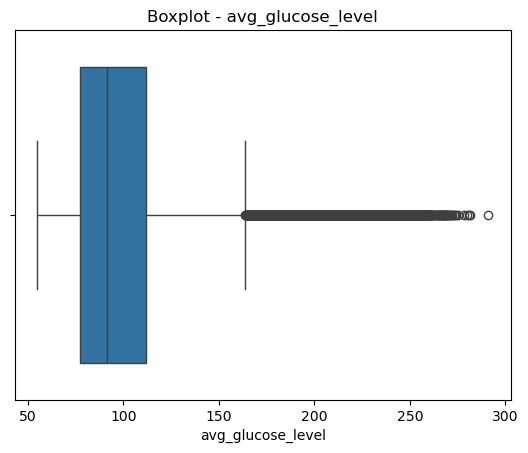

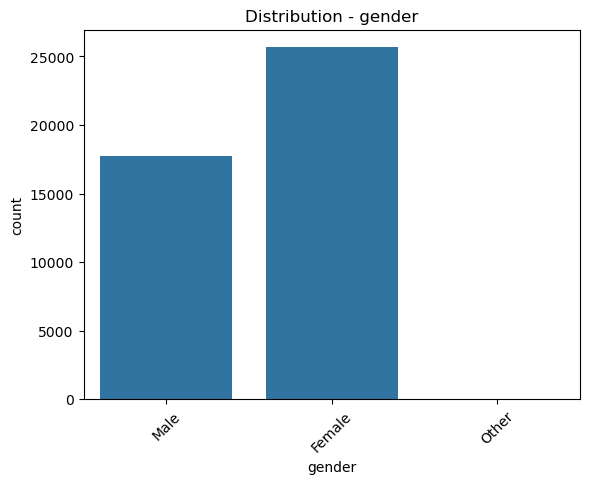

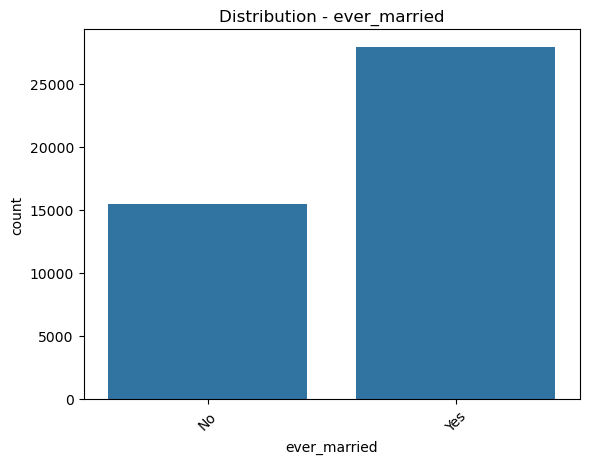

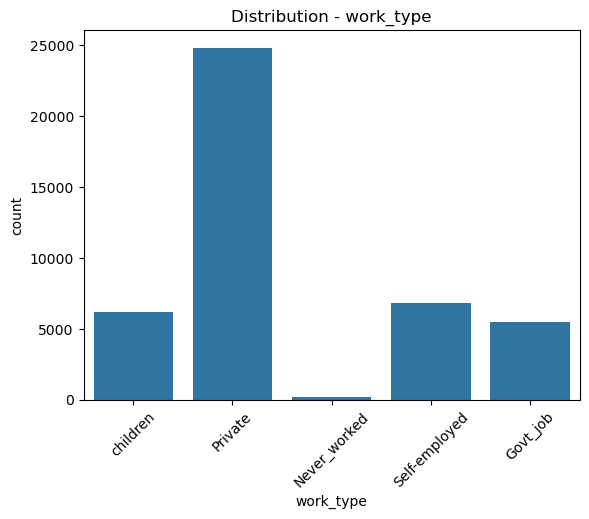

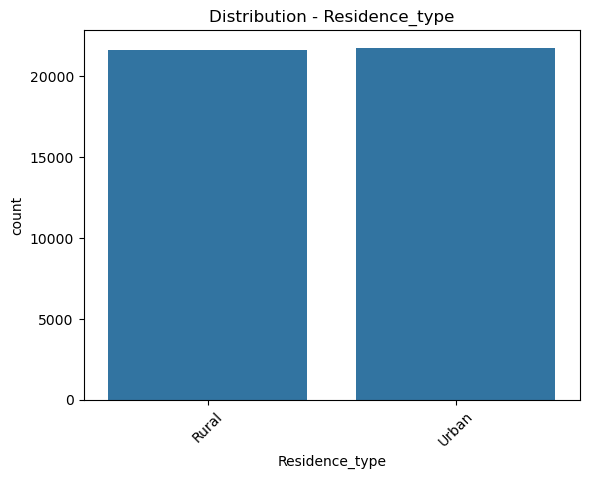

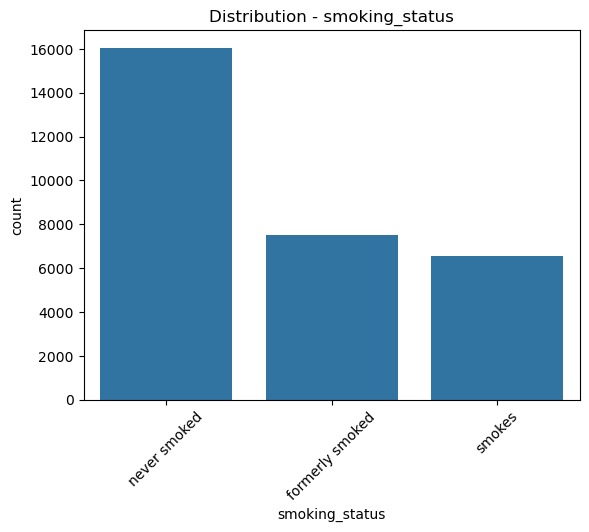

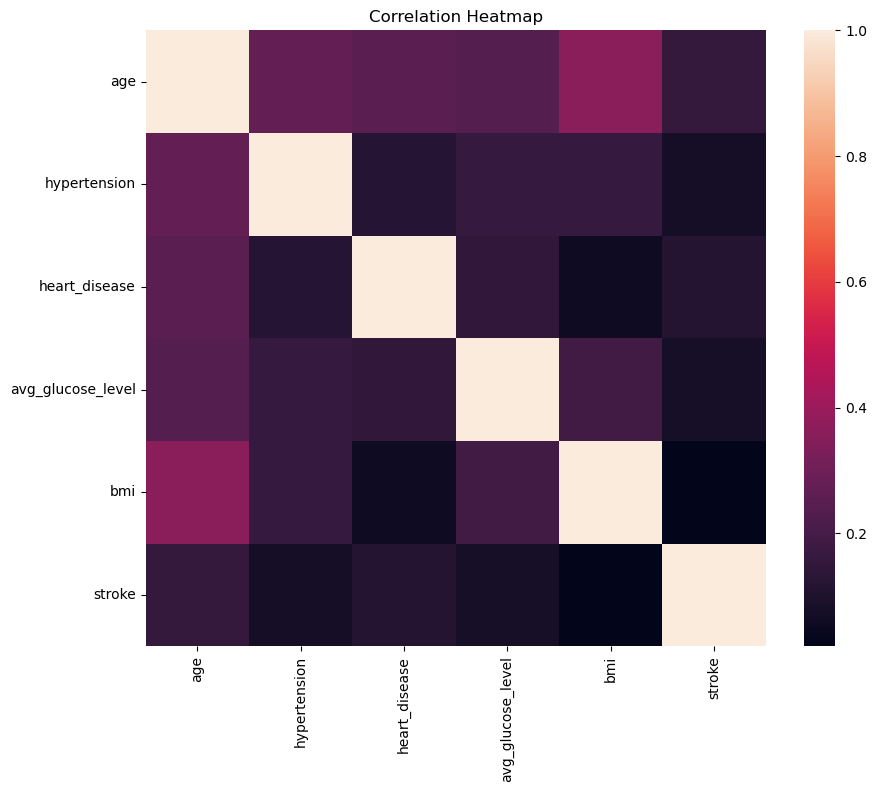

In [23]:
# Histograms
df.hist(figsize=(12,8))
plt.show()

# Boxplots numeric
for col in numerical_features:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot - {col}")
    plt.show()

# Category counts
for col in categorical_features + ordinal_features:
    sns.countplot(x=df[col])
    plt.title(f"Distribution - {col}")
    plt.xticks(rotation=45)
    plt.show()

# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=False)
plt.title("Correlation Heatmap")
plt.show()


### Preprocessing: Missing data, Encoding e Scaling

#### Goal
Describe and justify the transformations applied to obtain a clean and prepared subset for the modeling.

#### Decisions
- Imputation Features:
  - Numerical: median (robust for outliers).  
  - Categorical and Ordinal: mode (preserve most common category).  
- Encoding:
  - Nominal (categorical): one-hot encoding (treat unknow categories).  
  - Ordinal: ordinal encoding based on the predefined order. Any unknown categories (like "Unknown") will be automatically encoded as -1.
- Scaling:
  - `StandardScaler()` for numerical features when necessary (SVM, KNN, logistic regression, neural networks).

#### Output
- Count of missing values before and after imputation.
- Verify number of columns after one-hot encoding.

In [24]:
# Order for ordinal features
smoking_order = ['never smoked', 'formerly smoked', 'smokes']

# Numeric pipeline (median imputation)
numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    # Add scaler if needed:
    # ('scaler', StandardScaler())
])

# Categorical pipeline (most frequent imputation + one-hot encoding)
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))

])

# Ordinal pipeline (most frequent imputation + ordinal encoding)
ordinal_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('ordinal', OrdinalEncoder(categories=[smoking_order], handle_unknown='use_encoded_value', unknown_value=-1))
])


### Pipelines Combination

#### Goal
Build final preprocessor and describe the plan for feature engineering.

#### Decisions
- Integrate pipelines into a single `preprocessor.
- Binary features: applied passthrough on them, as they are already in 0/1 format.
- Remainder: configured to drop  any unspecified columns to prevent data leakage from unused features.

#### Output
- A preprocessor object that is now ready to be fitted on the training data.

In [25]:
# Combine the pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features),
        ('ord', ordinal_pipeline, ordinal_features),
        ('bin', 'passthrough', binary_features)
    ],
    remainder='drop'
)

# Done — preprocessor ready for model pipeline
preprocessor


ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['age', 'bmi', 'avg_glucose_level']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['gender', 'ever_married', 'work_type',
                                  'Residence_type']),
                                ('ord',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['never '
                                                                              'smoked',
                                                                              'formerly '
                                                                              'smoked',
                                                                              'smokes']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1))]),
                                 ['smoking_status']),
                                ('bin', 'passthrough',
                                 ['hypertension', 'heart_disease'])])

### Final Step: Apply Preprocessing (M1)
We now fit and apply the preprocessing pipeline to the training, validation, and test sets.
This finalizes the data preparation stage required for M1.
Model training and performance evaluation will be completed in M2.

In [26]:
from scipy.sparse import issparse

X_train_prepared = preprocessor.fit_transform(x_train)
X_val_prepared = preprocessor.transform(x_val)
X_test_prepared = preprocessor.transform(x_test)

print("Train shape before:", x_train.shape)
print("Train shape after preprocessing:", X_train_prepared.shape)

# Convert to dense if needed
if issparse(X_train_prepared):
    X_train_dense = X_train_prepared.toarray()
else:
    X_train_dense = X_train_prepared

# Convert dense matrix to DataFrame safely
X_train_df = pd.DataFrame(X_train_dense)

X_train_df.head()





Train shape before: (26040, 10)
Train shape after preprocessing: (26040, 18)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,61.0,24.7,55.99,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,79.0,25.0,260.91,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,78.0,27.7,118.00,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
3,69.0,25.0,87.07,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,8.0,16.3,70.87,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
